# 분류( classification)
  - 로지스틱 회귀
  - 결정 트리 + 산점도/선형 회귀 그래프 : 움직임을 분류(센서데이터)

# 핵심개념
  - 로지스틱 회귀, 시그모이드 함수, 성능평가지표, 오차행렬, 정밀도, 재현율 ,F1 스코어, ROC기반 AUC 스코어
  - 데이터 : 유방암 진단 데이터 - 사이킷런 내장 데이터

- 로지스틱회귀
  - 선형이 아닌 s자모양의 시그모이드 함수
  - x가 커지면 1에 가깝게되고 작아지면 0에 가깝게 되는 그래서 0과 1을 분류하는 이진분류에 사용

# 평가방법
  - 선형회귀 : MSE MAE RMSE R2
  - 분류(로지스틱 회귀) : 오차행렬 confusion matrix함수
    - 참과 거짓을 얼마나 잘 맞추는지
    - 정상인이 99명이고 환자가 1명... 그런데.. 무조건 정상이라고 판단하면
      - 단순히 맞다틀리다로 성능을 평가하면... 99%


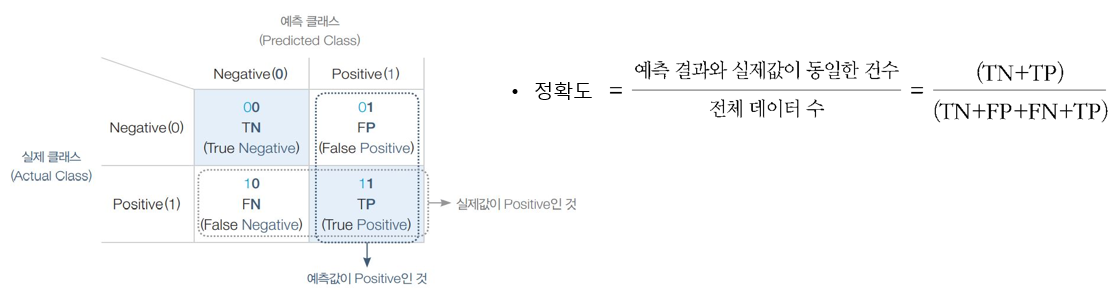      

- 정밀도( precision_socre함수) : 예측이 Positive인것(FP+TP) 중에서, 참인 것(TP)의 비율
  - 모델이 긍정으로 예측한 것 중에서 실제로 긍정인 비율
  - TP/ (FP + TP)
- 재현율(recall_score 함수) : 실제값이 Positive인것(FN+TP)중에서, 참인것(TP)의 비율
  - 실제 긍정인 것 중에서 모델이 긍정으로 맞춘 비율
  - TP / (FN + TP)
- 정밀도와 재현율을 트리이드오프 관계에 있다
  - F1 score
    - 정밀도와 재현율을 합친것
    - 2 x ( 정밀도 x 재현율 / (정밀도 + 재현율) )

ROC 기반 AUC 스코어
  - 오차행렬 FPR(False Positive Rate)와 TPR(True Positive Rate:)에 대한 변화율
  - FPR = FP/(FP+TN)
  - TPR = TP/(TP+FN)

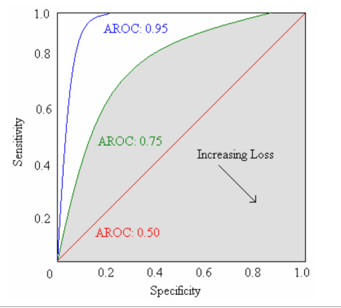  




In [67]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [68]:
b_cancel = load_breast_cancer()
b_cancel_df = pd.DataFrame(b_cancel.data, columns=b_cancel.feature_names)
b_cancel_df['target'] = b_cancel.target

In [69]:
b_cancel_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [70]:
# b_cancel_df.info()
b_cancel_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

- 로지스틱 회귀를 적용하기 위해서 (0 ~ 1 사이를 가지는 시그모이드 함수)
- 데이터를 평균이0 분산이1 되는 정규분포형태로 맞춘다

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 정규분포형태로 변환해 주는 객체

In [72]:
# 데이터를 정규분포형태로 적용
b_cancel_scaled = scaler.fit_transform(b_cancel_df.drop('target', axis=1))
b_cancel_df.values[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
       0.000e+00])

In [73]:
b_cancel_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [74]:
# 모델선정
# 데이터 분할(학습,테스트)
# 학습
# 예측
# 평가

In [75]:
X = b_cancel_scaled
y = b_cancel_df['target'].to_numpy()
X.shape, y.shape

((569, 30), (569,))

In [76]:
# 훈련/테스트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [77]:
# 로지스틱 모델
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [78]:
# 훈련,평가
model.fit(X_train, y_train)
model.score(X_test, y_test)  # accuracy 정확도

0.9824561403508771

In [79]:
# 정확도,재현율, F1 스코어 ROC 커브
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
predict = model.predict(X_test)
print(f"정확도 : {accuracy_score(y_test, predict)}")
print(f"정밀도 : {precision_score(y_test, predict)}")
print(f"재현율 : {recall_score(y_test, predict)}")
print(f"F1 score : {f1_score(y_test, predict)}")
print(f"roc curve : {roc_auc_score(y_test, predict)}")

정확도 : 0.9824561403508771
정밀도 : 0.9868421052631579
재현율 : 0.9868421052631579
F1 score : 0.9868421052631579
roc curve : 0.980263157894737


In [80]:
# 로지스틱회귀는 이진분류 왜 그러냐면... 0일때의 확률값과 1일때의 확률값을 두개를 예측해서..
# 결국 0과 1을 선택하는 알고리즘
y_predict_proba = model.predict_proba(X_test)
y_predict_proba[5], predict[5]
# y_predict_proba 실제 값  (0일때의 값과 1일때의 값 즉 확률)

(array([0.0016199, 0.9983801]), 1)

Roc 커브 시각화

[           inf 9.99999490e-01 5.77460448e-01 3.28494783e-01
 3.26797045e-01 7.87440748e-23]


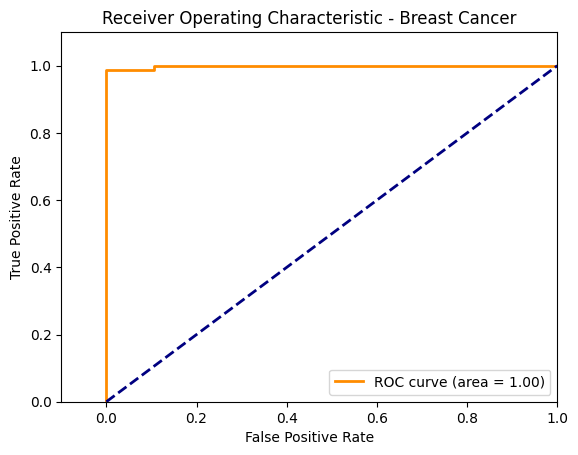

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# 악성일때 클래스가 1일때 예측 값
y_predict_proba = model.predict_proba(X_test)[:, 1]  # model.predict_proba(X_test) 0 과 1

fpr, tpr,thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = roc_auc_score(y_test, y_predict_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 (랜덤 추측)
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Breast Cancer')
plt.legend(loc='lower right')
plt.show()

로지스틱회귀 실습

신용카드 사기여부 판단
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [82]:
!unzip /content/drive/MyDrive/data/kaggle/archive.zip -d data

Archive:  /content/drive/MyDrive/data/kaggle/archive.zip
replace data/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/creditcard.csv     


In [83]:
import pandas as pd
df = pd.read_csv('/content/data/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [84]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [85]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [86]:
# 데이터 결측치 확인(만약에 있으면 어떻게 처리할 것인지)
# 독립변수 종속변수 분리
# 독립변수 정규화(스탠다스 스케일)
# 학습용 테스트용 분리
# 로지스틱 모델 적용
# 학습
# 평가(정확도,정밀도,재현율,F1스코어, Roc 커브)

In [88]:
df.isna().sum()  # 결측치 없음

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [89]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.2, random_state=11)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
y_predict_proba = model.predict_proba(X_test_scaled)[:, 1]  # 사기 클래스에 대한 확률  roc acu 커브시각화
print(f"accuracy : {accuracy_score(y_test, y_predict)}")
print(f"roc_auc : {roc_auc_score(y_test, y_predict_proba)}")
print(f"f1_score : {f1_score(y_test, y_predict)}")

accuracy : 0.9991046662687406
roc_auc : 0.9672299027137736
f1_score : 0.7411167512690354


시각화

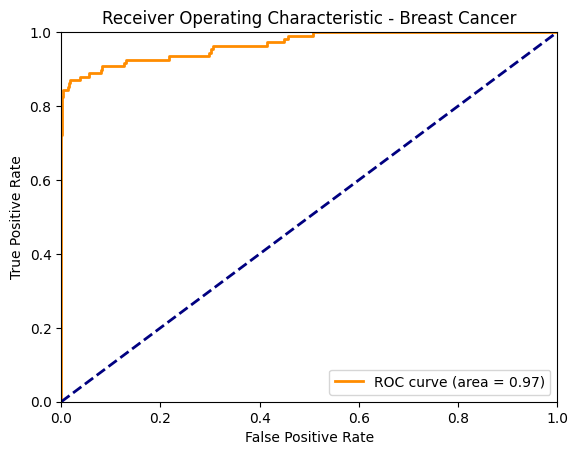

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# 악성일때 클래스가 1일때 예측 값

fpr, tpr,thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = roc_auc_score(y_test, y_predict_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 (랜덤 추측)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Breast Cancer')
plt.legend(loc='lower right')
plt.show()